In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,confusion_matrix,f1_score,classification_report,silhouette_score
from sklearn.datasets import load_iris
!pip install xgboost
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
iris = load_iris()
type(iris)

sklearn.utils._bunch.Bunch

In [4]:
iris.keys()


dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [6]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [7]:
iris_data= pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
iris_data['Iris category'] = iris['target']

iris_data.head()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['Category'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   Category           150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [11]:
# Find duplicate rows based on all columns
duplicates = df[df.duplicated()]

# Print the duplicate rows
print(duplicates)


     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
142                5.8               2.7                5.1               1.9   

     Category  
142         2  


In [12]:
df.drop_duplicates(inplace=True)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [13]:
unique_values = {}  # Create a dictionary to store unique values and their lengths

for column in df.columns:
    unique = df[column].unique()  # Get unique values for the column
    length = len(unique)  # Get the length of unique values
    unique_values[column] = {"unique_values": unique, "length": length}

# Print the unique values and their lengths for each feature
for column, values in unique_values.items():
    print(f"Feature: {column}")
    print(f"Unique Values: {values['unique_values']}")
    print(f"Number of Unique Values: {values['length']}")
    print()

Feature: sepal length (cm)
Unique Values: [5.1 4.9 4.7 4.6 5.  5.4 4.4 4.8 4.3 5.8 5.7 5.2 5.5 4.5 5.3 7.  6.4 6.9
 6.5 6.3 6.6 5.9 6.  6.1 5.6 6.7 6.2 6.8 7.1 7.6 7.3 7.2 7.7 7.4 7.9]
Number of Unique Values: 35

Feature: sepal width (cm)
Unique Values: [3.5 3.  3.2 3.1 3.6 3.9 3.4 2.9 3.7 4.  4.4 3.8 3.3 4.1 4.2 2.3 2.8 2.4
 2.7 2.  2.2 2.5 2.6]
Number of Unique Values: 23

Feature: petal length (cm)
Unique Values: [1.4 1.3 1.5 1.7 1.6 1.1 1.2 1.  1.9 4.7 4.5 4.9 4.  4.6 3.3 3.9 3.5 4.2
 3.6 4.4 4.1 4.8 4.3 5.  3.8 3.7 5.1 3.  6.  5.9 5.6 5.8 6.6 6.3 6.1 5.3
 5.5 6.7 6.9 5.7 6.4 5.4 5.2]
Number of Unique Values: 43

Feature: petal width (cm)
Unique Values: [0.2 0.4 0.3 0.1 0.5 0.6 1.4 1.5 1.3 1.6 1.  1.1 1.8 1.2 1.7 2.5 1.9 2.1
 2.2 2.  2.4 2.3]
Number of Unique Values: 22

Feature: Category
Unique Values: [0 1 2]
Number of Unique Values: 3



In [14]:
#Check for NaN values in the DataFrame
nan_values = df.isna().sum()

# Display the NaN values for each column
print(nan_values)


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Category             0
dtype: int64


In [20]:
from sklearn.model_selection import train_test_split



X_train, X_test, Y_train, Y_test = train_test_split(df[iris.feature_names],df["Category"], test_size=0.2)
print('There are {} samples in the training set and {} samples in the test set'.format(X_train.shape[0], X_test.shape[0]))

There are 119 samples in the training set and 30 samples in the test set


In [21]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [23]:
model.fit(X_train, Y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [24]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
32,5.2,4.1,1.5,0.1
68,6.2,2.2,4.5,1.5
23,5.1,3.3,1.7,0.5
133,6.3,2.8,5.1,1.5
76,6.8,2.8,4.8,1.4
79,5.7,2.6,3.5,1.0
86,6.7,3.1,4.7,1.5
108,6.7,2.5,5.8,1.8
42,4.4,3.2,1.3,0.2


In [25]:
y_predicted = model.predict(X_test)
model.predict_proba(X_test)

array([[9.83729658e-01, 1.62703267e-02, 1.54778547e-08],
       [9.83573359e-01, 1.64266084e-02, 3.25251222e-08],
       [3.08375537e-03, 7.53993318e-01, 2.42922927e-01],
       [9.50951221e-01, 4.90480021e-02, 7.76728291e-07],
       [8.23559249e-04, 4.78463249e-01, 5.20713192e-01],
       [1.61419082e-03, 7.73490851e-01, 2.24894958e-01],
       [8.45895604e-02, 9.09580749e-01, 5.82969095e-03],
       [3.03874083e-03, 7.76056444e-01, 2.20904815e-01],
       [1.17752444e-05, 6.54538427e-02, 9.34534382e-01],
       [9.88255653e-01, 1.17443050e-02, 4.16058585e-08],
       [5.29165307e-06, 3.24169576e-02, 9.67577751e-01],
       [3.20090912e-01, 6.77535460e-01, 2.37362810e-03],
       [1.42856050e-02, 7.27194740e-01, 2.58519655e-01],
       [9.73727929e-01, 2.62719930e-02, 7.79280864e-08],
       [2.05595164e-01, 7.89351463e-01, 5.05337308e-03],
       [9.63196933e-01, 3.68027777e-02, 2.89198095e-07],
       [7.57829744e-03, 8.31583422e-01, 1.60838281e-01],
       [9.95129935e-01, 4.87005

In [27]:
model.score(X_test,Y_test)

1.0

In [28]:
y_predicted

array([0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 1, 2, 1, 0])

In [29]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
14,5.8,4.0,1.2,0.2
32,5.2,4.1,1.5,0.1
68,6.2,2.2,4.5,1.5
23,5.1,3.3,1.7,0.5
133,6.3,2.8,5.1,1.5
76,6.8,2.8,4.8,1.4
79,5.7,2.6,3.5,1.0
86,6.7,3.1,4.7,1.5
108,6.7,2.5,5.8,1.8
42,4.4,3.2,1.3,0.2


In [30]:
#model.coef_ indicates value of m in y=m*x + b equation

model.coef_

array([[-0.46875977,  0.79797781, -2.3577328 , -0.954396  ],
       [ 0.49826064, -0.19661859, -0.08186678, -1.02070065],
       [-0.02950087, -0.60135922,  2.43959958,  1.97509665]])

In [31]:
model.intercept_

array([  9.90354048,   1.45342128, -11.35696176])

In [37]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


print("Score :",model.score(X_test,Y_test))
print("Accuracy_score :",accuracy_score(Y_test,y_predicted))
print('Confusion Matrix:', confusion_matrix(Y_test,y_predicted))
print('F1 score:', f1_score(Y_test,y_predicted, average='macro'))
print('Classification Report:',classification_report(Y_test,y_predicted))

Score : 1.0
Accuracy_score : 1.0
Confusion Matrix: [[13  0  0]
 [ 0 11  0]
 [ 0  0  6]]
F1 score: 1.0
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [39]:
#Decision Tree Classifier


from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier()
DTC.fit(X_train,Y_train)

DecisionTreeClassifier()

In [41]:
y_pred=DTC.predict(X_test)
y_pred

array([0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 1, 2, 1, 0])

In [43]:
print('Score:',DTC.score(X_test,Y_test))
print("Accuracy_score :",accuracy_score(Y_test,y_pred))
print('F1 score : ',f1_score(Y_test, y_pred, average='macro'))
print("confusion_matrix:",confusion_matrix(Y_test,y_pred), ['sentosa', 'versicolor', 'virginica'])
print(classification_report(Y_test,y_pred))

Score: 0.9666666666666667
Accuracy_score : 0.9666666666666667
F1 score :  0.9584859584859585
confusion_matrix: [[13  0  0]
 [ 0 10  1]
 [ 0  0  6]] ['sentosa', 'versicolor', 'virginica']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.91      0.95        11
           2       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [45]:
#Decision Tree Classifier with Parameter Tuning



#pre-pruning
parameter={
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5],
    'max_features':['auto','sqrt','log2']
}
from sklearn.model_selection import GridSearchCV
model = DecisionTreeClassifier()  #model obj creation
#model.fit(x_train,y_train)
cv=GridSearchCV(model,parameter,scoring='accuracy')
cv.fit(X_train,Y_train)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", 

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy')

In [46]:
best_model=cv.best_estimator_
best_model

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features='sqrt')

In [47]:
model = DecisionTreeClassifier(criterion='entropy',max_depth=2,max_features='log2')  #model obj creation
model.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_features='log2')

[Text(0.375, 0.875, 'x[2] <= 2.6\nentropy = 1.582\nsamples = 119\nvalue = [37, 39, 43]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 0.998\nsamples = 82\nvalue = [0, 39, 43]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.378\nsamples = 41\nvalue = [0, 38, 3]'),
 Text(0.125, 0.125, 'entropy = 0.179\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(0.375, 0.125, 'entropy = 1.0\nsamples = 4\nvalue = [0, 2, 2]'),
 Text(0.75, 0.375, 'x[0] <= 5.95\nentropy = 0.165\nsamples = 41\nvalue = [0, 1, 40]'),
 Text(0.625, 0.125, 'entropy = 0.65\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(0.875, 0.125, 'entropy = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

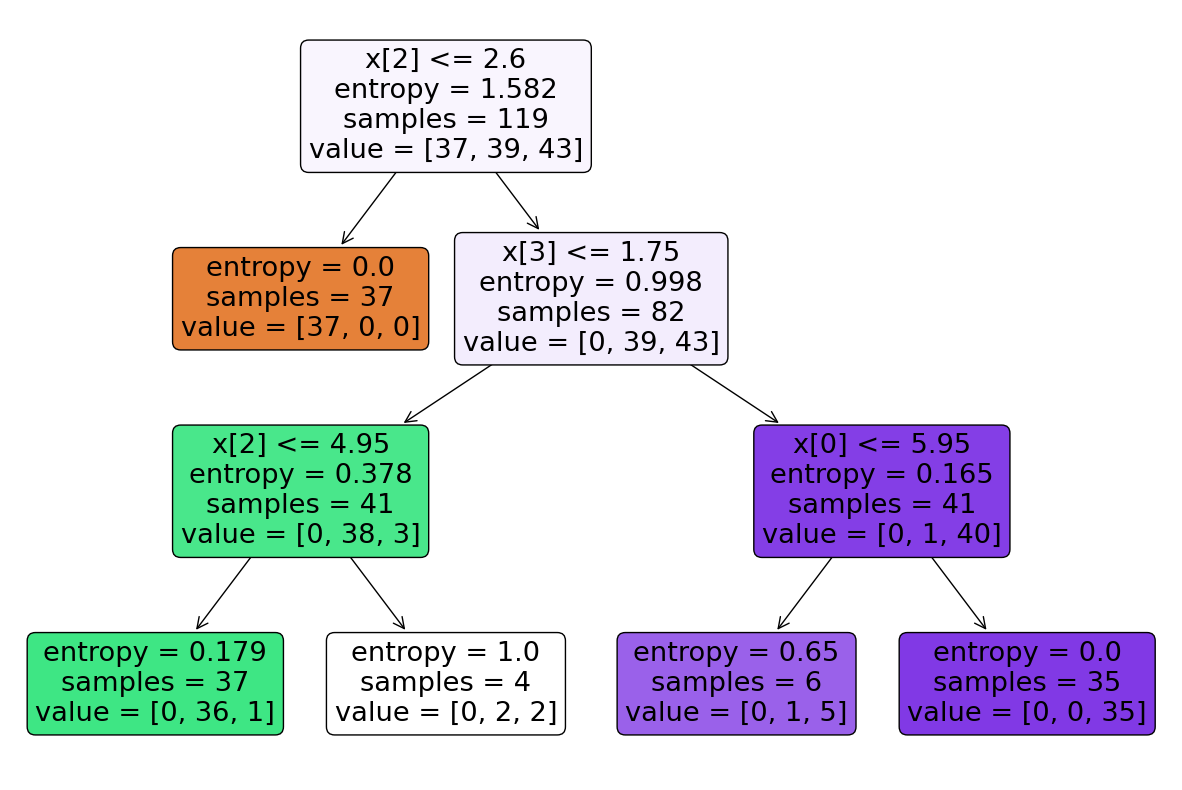

In [49]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import tree

plt.figure(figsize=(15, 10))
plot_tree(best_model, feature_names=None, class_names=None, filled=True, rounded=True)

In [51]:
#Post Pruning
#model=DecisionTreeClassifier()
path = model.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
print(ccp_alphas)

clfs = []
for ccp_alpha in ccp_alphas:
    clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)

[0.         0.50078307 0.8942376 ]


In [55]:

DTC_pred = best_model.predict(X_test)
DTC_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       2, 0, 1, 0, 1, 2, 1, 0])

In [56]:
print("score:",model.score(X_test,Y_test))
print("Accuracy score:",accuracy_score(Y_test,DTC_pred))
print('F1 score :', f1_score(Y_test,DTC_pred, average='macro'))
print('Confusion Matrix:', confusion_matrix(Y_test, DTC_pred))
print('Classification Report :', classification_report(Y_test, DTC_pred))

score: 0.9333333333333333
Accuracy score: 0.9333333333333333
F1 score : 0.9055555555555556
Confusion Matrix: [[13  0  0]
 [ 0 11  0]
 [ 0  2  4]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      1.00      0.92        11
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.95      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



In [57]:
#K-Nearest Neighbor



from sklearn.neighbors import KNeighborsClassifier
KNN= KNeighborsClassifier()
KNN.fit(X_train,Y_train)

KNeighborsClassifier()

In [60]:
y_pred=KNN.predict(X_test)
y_pred

array([0, 0, 1, 0, 2, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       2, 0, 2, 0, 1, 2, 1, 0])

In [63]:
print('Score:',KNN.score(X_test,Y_test))
print('Accuracy score:',accuracy_score(Y_test,y_pred))
print('F1 score : ',f1_score(Y_test,y_pred, average='macro'))
print("confusion_matrix:",confusion_matrix(Y_test,y_pred), ['sentosa', 'versicolor', 'virginica'])
print(classification_report(Y_test,y_pred))

Score: 1.0
Accuracy score: 1.0
F1 score :  1.0
confusion_matrix: [[13  0  0]
 [ 0 11  0]
 [ 0  0  6]] ['sentosa', 'versicolor', 'virginica']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [64]:
#KNN with Parameter Tuning



from sklearn.neighbors import KNeighborsClassifier
param_grid ={
    'n_neighbors': [3, 5, 7, 9, 11], 
    'weights': ['uniform', 'distance',None],  
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
KNN = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=KNN, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance', None]},
             scoring='accuracy')

In [65]:
best_params = grid_search.best_params_
print("Best Number of Neighbors:", best_params['n_neighbors'])
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(Y_test,y_pred)
print(f'Accuracy with Best Model: {accuracy:.2f}')
print('F1 score:', f1_score(Y_test,y_pred, average='macro'))
print('Confusion Matrix:', confusion_matrix(Y_test,y_pred))
print(' Classification Report:', classification_report(Y_test,y_pred))

Best Number of Neighbors: 5
Accuracy with Best Model: 1.00
F1 score: 1.0
Confusion Matrix: [[13  0  0]
 [ 0 11  0]
 [ 0  0  6]]
 Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [66]:
#Random Forest Classifier


from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train,Y_train)

RandomForestClassifier()

In [68]:
y_pred=RF.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       2, 0, 1, 0, 1, 2, 1, 0])

In [69]:
print("Score:",RF.score(X_test,Y_test))
print('Accuracy score:',RF.score(X_test,Y_test))
print('F1 score : ',f1_score(Y_test,y_pred, average='macro'))
print("confusion_matrix:",confusion_matrix(Y_test,y_pred), ['sentosa', 'versicolor', 'virginica'])
print(classification_report(Y_test,y_pred))

Score: 0.9333333333333333
Accuracy score: 0.9333333333333333
F1 score :  0.9055555555555556
confusion_matrix: [[13  0  0]
 [ 0 11  0]
 [ 0  2  4]] ['sentosa', 'versicolor', 'virginica']
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      1.00      0.92        11
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.95      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



In [70]:
#Random Forest Classifier with Parameter Tuning

parameter={
    'n_estimators':[10,50,100],
    'criterion':['gini','entropy','log_loss'],
    'max_depth':np.arange(2,10,2),
    'max_features':[None,'sqrt','log2'],
    "bootstrap": [True, False]
    }

RF= RandomForestClassifier()

cv=GridSearchCV(RF,parameter,scoring='accuracy')
cv.fit(X_train,Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([2, 4, 6, 8]),
                         'max_features': [None, 'sqrt', 'log2'],
                         'n_estimators': [10, 50, 100]},
             scoring='accuracy')

In [72]:
print ('Random grid: ',parameter)
best_params = cv.best_params_
print ('Best Parameters: ',best_params)
best_f1_score =cv.best_score_
print("Best F1 Score:", best_f1_score)
best_model =cv.best_estimator_
best_model.fit(X_train,Y_train)
RF_pred=best_model.predict(X_test)
print('Score:',best_model.score(X_test,Y_test))
print('Accuracy score:',accuracy_score(Y_test,RF_pred))
print('Confusion Matrix:', confusion_matrix(Y_test,RF_pred))
print('Classification Report :',classification_report(Y_test,RF_pred))

Random grid:  {'n_estimators': [10, 50, 100], 'criterion': ['gini', 'entropy', 'log_loss'], 'max_depth': array([2, 4, 6, 8]), 'max_features': [None, 'sqrt', 'log2'], 'bootstrap': [True, False]}
Best Parameters:  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 10}
Best F1 Score: 0.9666666666666668
Score: 0.9333333333333333
Accuracy score: 0.9333333333333333
Confusion Matrix: [[13  0  0]
 [ 0 11  0]
 [ 0  2  4]]
Classification Report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      1.00      0.92        11
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.95      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



In [75]:
#Ada Boost Classifier

from sklearn.ensemble import AdaBoostClassifier

Adaboost=AdaBoostClassifier()
Adaboost.fit(X_train,Y_train)

AdaBoostClassifier()

In [76]:
Adaboost_pred=Adaboost.predict(X_test)
print("Score:",Adaboost.score(X_test,Y_test))
print("Accuracy score:",accuracy_score(Y_test,Adaboost_pred))
print("F1 Sore:",f1_score(Y_test,Adaboost_pred,average='macro'))
print("confusion matrix:",confusion_matrix(Y_test,Adaboost_pred))
print("Classification Report:",classification_report(Y_test,Adaboost_pred))

Score: 0.9333333333333333
Accuracy score: 0.9333333333333333
F1 Sore: 0.9055555555555556
confusion matrix: [[13  0  0]
 [ 0 11  0]
 [ 0  2  4]]
Classification Report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.85      1.00      0.92        11
           2       1.00      0.67      0.80         6

    accuracy                           0.93        30
   macro avg       0.95      0.89      0.91        30
weighted avg       0.94      0.93      0.93        30



In [77]:
#Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier
Grboost=GradientBoostingClassifier()
Grboost.fit(X_train,Y_train)

GradientBoostingClassifier()

In [78]:
Grboost_pred=Grboost.predict(X_test)
print('Score:',Grboost.score(X_test,Y_test))
print('Accuracy score:',accuracy_score(Y_test,Grboost_pred))
print('F1 Score:',f1_score(Y_test,Grboost_pred,average='macro'))
print('Confusion matrix:',confusion_matrix(Y_test,Grboost_pred))
print('Classification report:',classification_report(Y_test,Grboost_pred))

Score: 0.9666666666666667
Accuracy score: 0.9666666666666667
F1 Score: 0.9552042160737813
Confusion matrix: [[13  0  0]
 [ 0 11  0]
 [ 0  1  5]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.92      1.00      0.96        11
           2       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.97      0.94      0.96        30
weighted avg       0.97      0.97      0.97        30



In [79]:
#XGB Classifier Model

import xgboost as xgb
XGB=xgb.XGBClassifier()
XGB.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [80]:
XGB_pred=XGB.predict(X_test)
print('score:',XGB.score(X_test,Y_test))
print('Accuracy score:',accuracy_score(Y_test,XGB_pred))
print('F1 score:',f1_score(Y_test,XGB_pred,average='macro'))
print('Confusion matrix:',confusion_matrix(Y_test,XGB_pred))
print('Classification report',classification_report(Y_test,XGB_pred))

score: 0.9
Accuracy score: 0.9
F1 score: 0.8775093934514224
Confusion matrix: [[13  0  0]
 [ 1 10  0]
 [ 0  2  4]]
Classification report               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.83      0.91      0.87        11
           2       1.00      0.67      0.80         6

    accuracy                           0.90        30
   macro avg       0.92      0.86      0.88        30
weighted avg       0.91      0.90      0.90        30



In [81]:
#Support vector classifier

from sklearn.svm import SVC
SV=SVC(kernel = 'rbf', C = 3)
SV.fit(X_train,Y_train)

SVC(C=3)

In [82]:
SV_pred=SV.predict(X_test)
print("Score:",SV.score(X_test,Y_test))
print("Accuracy score",accuracy_score(Y_test,SV_pred))
print("F1 score:",f1_score(Y_test,SV_pred,average='macro'))
print('Confusion matrix:',confusion_matrix(Y_test,SV_pred))
print('Classification report:',classification_report(Y_test,SV_pred))

Score: 1.0
Accuracy score 1.0
F1 score: 1.0
Confusion matrix: [[13  0  0]
 [ 0 11  0]
 [ 0  0  6]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [83]:
#Support vector classifier with Parameter Tuning

param_grid = {
    'C': [0.1, 1, 3, 10],          
    'gamma': [0.001, 0.01, 0.1],  
}
grid_search = GridSearchCV(estimator=SV, param_grid=param_grid, scoring='f1_macro', cv=5)
grid_search.fit(X_train, Y_train)
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
best_f1_score = grid_search.best_score_
print("Best F1 Score:", best_f1_score)
best_model = grid_search.best_estimator_

Best Hyperparameters: {'C': 10, 'gamma': 0.1}
Best F1 Score: 0.9761403508771931


In [84]:
SV_y_pred=grid_search.predict(X_test)
print("Score:",grid_search.score(X_test,Y_test))
print("Accuracy score",accuracy_score(Y_test,SV_y_pred))
print("F1 score:",f1_score(Y_test,SV_y_pred,average='macro'))
print('Confusion matrix:',confusion_matrix(Y_test,SV_y_pred))
print('Classification report:',classification_report(Y_test,SV_y_pred))

Score: 1.0
Accuracy score 1.0
F1 score: 1.0
Confusion matrix: [[13  0  0]
 [ 0 11  0]
 [ 0  0  6]]
Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [86]:
#Unsupervised Learning algorithm

from sklearn.datasets import load_iris
iris = load_iris()
iris_data= pd.DataFrame(data = iris['data'], columns = iris['feature_names'])
iris_data['Iris category'] = iris['target']
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris category
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [87]:
#K-Means Clustering

from sklearn.cluster import KMeans
wcss = []
k_range=range(1,10)
for k in k_range:
    kmeans=KMeans(n_clusters=k)

    kmeans.fit(iris_data)

    wcss.append(kmeans.inertia_)

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

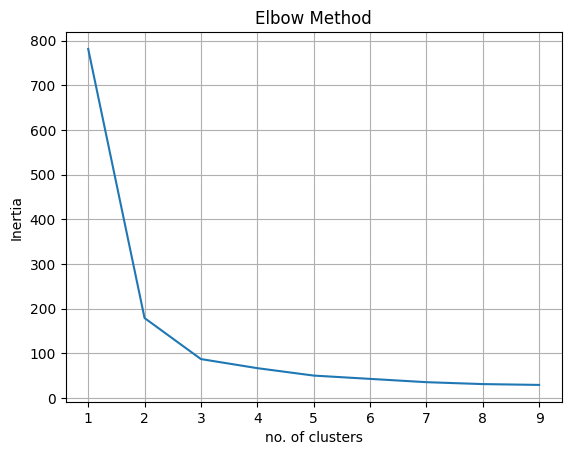

In [88]:
plt.plot(k_range,wcss)
plt.title("Elbow Method")
plt.xlabel("no. of clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

In [89]:
model=KMeans(n_clusters=3)
model.fit(iris_data)
iris_data.target=model.labels_#species is the target
df1=iris_data[iris_data.target==0]
df2=iris_data[iris_data.target==1]
df3=iris_data[iris_data.target==2]
model.cluster_centers_

C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\User\AppData\Local\Temp\ipykernel_9480\950604418.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  iris_data.target=model.labels_#species is the target


array([[6.62244898, 2.98367347, 5.57346939, 2.03265306, 2.        ],
       [5.006     , 3.428     , 1.462     , 0.246     , 0.        ],
       [5.91568627, 2.76470588, 4.26470588, 1.33333333, 1.01960784]])

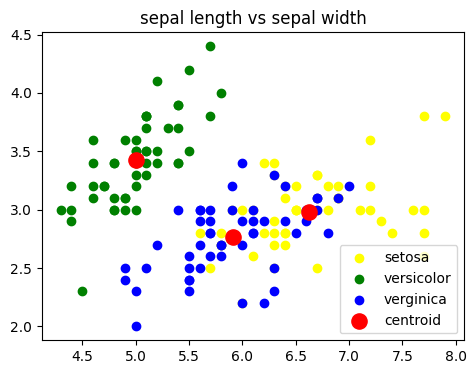

In [90]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(df1[['sepal length (cm)']],df1[['sepal width (cm)']],color="yellow",label="setosa")
plt.scatter(df2[['sepal length (cm)']],df2[['sepal width (cm)']],color="green",label="versicolor")
plt.scatter(df3[['sepal length (cm)']],df3[['sepal width (cm)']],color="blue",label="verginica")
plt.scatter(model.cluster_centers_[:,[0]],model.cluster_centers_[:,[1]],s=120,color="red",label="centroid")
plt.title('sepal length vs sepal width')
plt.legend()

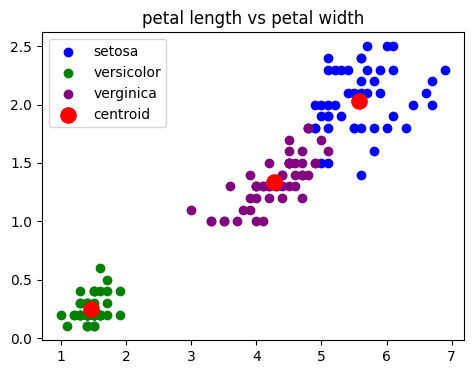

In [96]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,2)
plt.scatter(df1[['petal length (cm)']],df1[['petal width (cm)']],color="blue",label="setosa")
plt.scatter(df2[['petal length (cm)']],df2[['petal width (cm)']],color="green",label="versicolor")
plt.scatter(df3[['petal length (cm)']],df3[['petal width (cm)']],color="purple",label="verginica")
plt.scatter(model.cluster_centers_[:,[2]],model.cluster_centers_[:,[3]],s=120,color="red",label="centroid")
plt.title('petal length vs petal width')
plt.legend()

In [92]:
#Hierarchical Clustering


from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
scaler = StandardScaler()
data_scaled = scaler.fit_transform(iris_data)

In [93]:
n_clusters = 3 
agg_cluster = AgglomerativeClustering(n_clusters=n_clusters)
agg_cluster.fit(data_scaled)
iris_data['Cluster'] = agg_cluster.labels_
pred =agg_cluster .fit_predict(iris_data)

print('silhouette_score:',silhouette_score(iris_data,pred))

silhouette_score: 0.6664318214723987


Text(0.5, 1.0, 'Sepal Length vs Sepal Width')

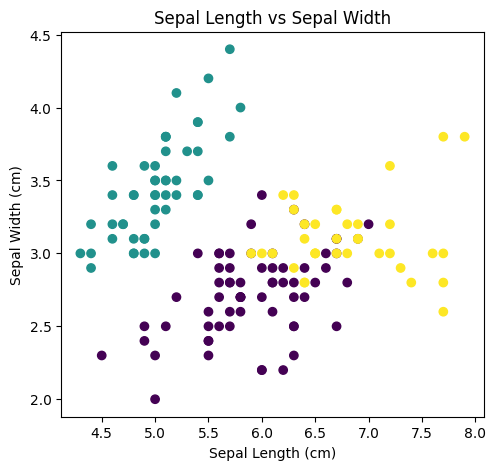

In [94]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1)
plt.scatter(iris_data['sepal length (cm)'], iris_data['sepal width (cm)'], c=iris_data['Cluster'], cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

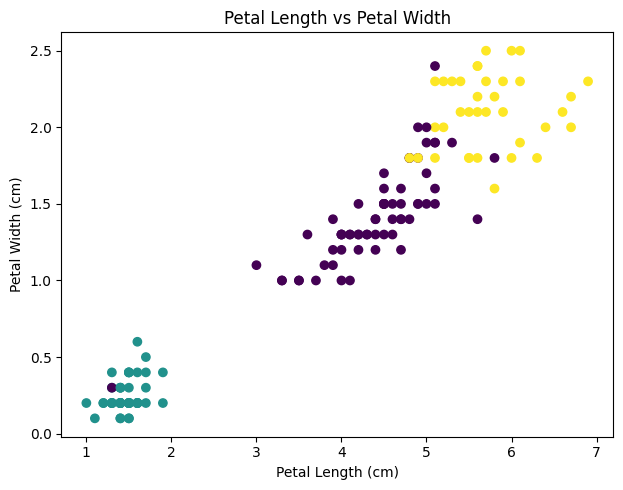

In [95]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 2)
plt.scatter(iris_data['petal length (cm)'],iris_data['petal width (cm)'], c=iris_data['Cluster'], cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')

plt.tight_layout()
plt.show()